# Стадии решения задач:

- подключение библиотек
- загрузка данных 
- разведочный анализ данных
- предварительная обработка данных
- обучение моделей
- прогнозирование

# Библиотеки:

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [295]:
import matplotlib.pyplot as plt

# Подключение DF

In [296]:
data = pd.read_csv("real_estate_data.csv", low_memory=False)

In [297]:
data

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR
403485,403486,Konut,Daire,2/21/19,NaN,2,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,NaN,900.0,TRY


## Описание данных:

1. id
2. type - тип желья
3. sub_type - подгруппа
4. start_date - Начало оформления документов (ММ//ДД//ГГ)
5. end_date - конец оформления дкументов (ММ//ДД//ГГ)
6. listing_type - Стутус недвижимости (Аренда\Продажа)
7. tom - Время на рынке (Формат: ДД)
8. building_age - время постройки 
9. total_floor_count - количество этажей в здании
10. floor_no - Количество этажей по документам
11. room_count - Количество комнат + Гостинная
12. size - Размер недвижемости в квадратных метрах
13. address - Адрес недвижимости
14. furnished - комликтация квартиры
• Eşyasız = Без мебели, 
• Sadece Beyaz Eşya = только белая бытовая техника, 
• Sadece Mutfak = только кухня
16. heating_type типы отопительных систем -
17. price цена за недвижемость -
18. price_curren - Валюта цены недвижемостиcy

## Разведочный анализ данных

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

### Пустые значения в DF

In [299]:
for col in data.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, data[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 137189
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 27390
Кол-во пропусков в колонке total_floor_count = 28021
Кол-во пропусков в колонке floor_no = 35296
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 146006
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 403487
Кол-во пропусков в колонке heating_type = 27970
Кол-во пропусков в колонке price = 715
Кол-во пропусков в колонке price_currency = 715


In [300]:
for col in data.columns:
    print(f'Кол-во пропусков в колонке {col} ={data[col].isna().sum()/data.shape[0] * 100:.2f} % ')

Кол-во пропусков в колонке id =0.00 % 
Кол-во пропусков в колонке type =0.00 % 
Кол-во пропусков в колонке sub_type =0.00 % 
Кол-во пропусков в колонке start_date =0.00 % 
Кол-во пропусков в колонке end_date =34.00 % 
Кол-во пропусков в колонке listing_type =0.00 % 
Кол-во пропусков в колонке tom =0.00 % 
Кол-во пропусков в колонке building_age =6.79 % 
Кол-во пропусков в колонке total_floor_count =6.94 % 
Кол-во пропусков в колонке floor_no =8.75 % 
Кол-во пропусков в колонке room_count =0.00 % 
Кол-во пропусков в колонке size =36.19 % 
Кол-во пропусков в колонке address =0.00 % 
Кол-во пропусков в колонке furnished =100.00 % 
Кол-во пропусков в колонке heating_type =6.93 % 
Кол-во пропусков в колонке price =0.18 % 
Кол-во пропусков в колонке price_currency =0.18 % 


In [301]:
data.describe()

,id,listing_type,tom,size,furnished,price
count,403487.00000,403487.000000,403487.000000,257481.000000,0.0,4.027720e+05
mean,201744.00000,1.294235,57.022739,279.349094,NaN,3.546417e+05
std,116476.80837,0.467733,44.358933,9429.195331,NaN,4.809503e+06
min,1.00000,1.000000,0.000000,1.000000,NaN,-2.500000e+02
25%,100872.50000,1.000000,29.000000,85.000000,NaN,2.500000e+03
50%,201744.00000,1.000000,40.000000,110.000000,NaN,1.990000e+05
75%,302615.50000,2.000000,90.000000,140.000000,NaN,3.420000e+05
max,403487.00000,3.000000,180.000000,948235.000000,NaN,2.000000e+09


# Обработка DF

### Столбец type

In [302]:
data['type'].value_counts()

type
Konut    403487
Name: count, dtype: int64

In [303]:
data = data.drop('type', axis=1)

### Столбец listing_type

In [304]:
Listing_counts = data['listing_type'].value_counts()
Listing_counts

listing_type
1    287009
2    114236
3      2242
Name: count, dtype: int64

In [305]:
mode_value = data[data['listing_type'] != 3]['listing_type'].mode()[0]
print(f"Самое частое значение (мода): {mode_value}")
data['listing_type'] = data['listing_type'].replace(3, mode_value)

Самое частое значение (мода): 1


In [306]:
Listing_counts = data['listing_type'].value_counts()
Listing_counts

listing_type
1    289251
2    114236
Name: count, dtype: int64

### Столбец size

In [307]:
data['size'].value_counts(dropna=False)

size
NaN        146006
90.0        16803
100.0       16234
120.0       15543
110.0       13546
            ...  
8239.0          1
529.0           1
27140.0         1
68202.0         1
14000.0         1
Name: count, Length: 944, dtype: int64

In [308]:
mean_size = data['size'].mean()
print(f"Среднее значение: {mean_size}")
data['size'] = data['size'].fillna(mean_size).astype(int)

Среднее значение: 279.3490937195366


In [309]:
print(data['size'].describe())
data['size'].hist()

count    403487.000000
mean        279.222770
std        7532.378718
min           1.000000
25%         100.000000
50%         150.000000
75%         279.000000
max      948235.000000
Name: size, dtype: float64


<Axes: >

In [310]:
small_values = data[data['size'] < 20]['size']
value_counts_small = small_values.value_counts().sort_index()
print(value_counts_small)
print("Всего: ",sum(value_counts_small))

size
1     291
2      27
3      23
4      16
5      17
6       4
7       1
8       7
9       3
10     45
11      5
12     11
13      4
14      3
15     14
16      1
17      7
18      8
19      6
Name: count, dtype: int64
Всего:  493


In [311]:
print(f"Размер датасета после удаления: {len(data)}")
print("Распределение оставшихся значений:")
print(data['size'].value_counts().sort_index())

Размер датасета после удаления: 403487
Распределение оставшихся значений:
size
1         291
2          27
3          23
4          16
5          17
         ... 
870752      2
902221      3
909039      1
930259      1
948235      1
Name: count, Length: 943, dtype: int64


### Столбец building_age

In [312]:
data['building_age'].value_counts()

building_age
0              140174
6-10 arası      50495
11-15 arası     32309
16-20 arası     31333
1               20355
4               19032
21-25 arası     18438
2               17466
3               15651
5               13589
26-30 arası     10581
31-35 arası      4268
36-40 arası      1347
40 ve üzeri      1059
Name: count, dtype: int64

In [313]:
# Функция для преобразования значений
def convert_building_age(value):
    if pd.isna(value):
        return value
    
    # Если значение уже число - возвращаем как есть
    if isinstance(value, (int, float)):
        return value
    
    value = str(value).strip()
    
    # Обрабатываем формат "40 ve üzeri" -> берем первое число
    if 've üzeri' in value:
        return int(value.split()[0])
    
    # Обрабатываем формат "6-10 arası" -> вычисляем среднее
    if '-' in value and 'arası' in value:
        numbers = value.split()[0].split('-')
        return round((int(numbers[0]) + int(numbers[1])) / 2)
    
    # Обрабатываем формат "26-30" (без arası)
    if '-' in value:
        numbers = value.split('-')
        return round((int(numbers[0]) + int(numbers[1])) / 2)
    
    # Если это просто число как текст
    try:
        return int(float(value))
    except:
        return value

# Применяем преобразование
data['building_age'] = data['building_age'].apply(convert_building_age)

# Преобразуем все в целые числа
data['building_age'] = pd.to_numeric(data['building_age'], errors='coerce').astype('Int64')

In [314]:
mean_age = data['building_age'].mean()
data['building_age'] = data['building_age'].fillna(round(mean_age)).astype(int)

In [315]:
data['building_age'].value_counts(dropna=False)

building_age
0     140174
8      50495
13     32309
18     31333
7      27390
1      20355
4      19032
23     18438
2      17466
3      15651
5      13589
28     10581
33      4268
38      1347
40      1059
Name: count, dtype: int64

### Столбец start_date и end_date и furnished

In [316]:
data = data.drop('start_date', axis=1)

In [317]:
data = data.drop('end_date', axis=1)

In [318]:
data = data.drop('furnished', axis=1)

In [319]:
data = data.drop('id', axis=1)

In [320]:
data

,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,Rezidans,2,30,0,20 ve üzeri,2,2+1,90,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,Daire,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,Daire,1,30,0,1,Yüksek Giriş,2+1,279,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,Rezidans,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,Rezidans,1,30,0,20 ve üzeri,2,2+1,90,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...
403482,Daire,2,162,7,NaN,NaN,+,279,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,Daire,1,139,7,NaN,NaN,2+1,279,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,Daire,1,97,7,NaN,NaN,1+1,279,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,Daire,2,6,7,NaN,NaN,2+1,2,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


### Столбец floor_no

In [321]:
data['floor_no'].value_counts(dropna=False)

floor_no
2               65864
3               52690
1               46756
NaN             35296
4               34465
Yüksek Giriş    24045
5               21193
Müstakil        21165
Bahçe katı      19065
Giriş Katı      10431
6                9747
7                7698
8                6099
Kot 1            5036
Kot 2            4987
9                4855
10               3863
Kot 3            3793
Çatı Katı        3566
Zemin Kat        3441
Komple           2958
11               2894
12               2309
Kot 4            2269
13               1702
20 ve üzeri      1563
14               1328
15                911
En Üst Kat        894
Bodrum Kat        815
16                600
17                373
18                334
Teras Kat         293
19                177
Asma Kat           12
Name: count, dtype: int64

In [322]:
data['floor_no'] = data['floor_no'].replace({
    'Yüksek Giriş': 0,
    'Bahçe katı': 0, 
    'Giriş Katı': 0,
    'Zemin Kat': 0,
    'Müstakil': 1,
    'Komple': 1,
    'Kot 1': -1,
    'Kot 2': -2, 
    'Kot 3': -3,
    'Kot 4': -4,
    'Çatı Katı': 99,
    'En Üst Kat': 99,
    'Teras Kat': 99,
    'Bodrum Kat': -1,
    'Asma Kat': 0,
    '20 ve üzeri': 20
})

In [323]:
data['floor_no'] = pd.to_numeric(data['floor_no'], errors='coerce')
mean_value = round(data['floor_no'].mean())
data['floor_no'] = data['floor_no'].fillna(mean_value).astype(int)

In [324]:
data

,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,Rezidans,2,30,0,20 ve üzeri,2,2+1,90,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,Daire,1,14,0,20 ve üzeri,20,1+0,43,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,Daire,1,30,0,1,0,2+1,279,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,Rezidans,1,30,3,20 ve üzeri,20,6+1,450,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,Rezidans,1,30,0,20 ve üzeri,2,2+1,90,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...
403482,Daire,2,162,7,NaN,4,+,279,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,Daire,1,139,7,NaN,4,2+1,279,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,Daire,1,97,7,NaN,4,1+1,279,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,Daire,2,6,7,NaN,4,2+1,2,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


### Столбец sub_type

In [325]:
data['sub_type'].value_counts(dropna=False)

sub_type
Daire                  354549
Villa                   21324
Müstakil Ev              9563
Rezidans                 7716
Yazlık                   5929
Komple Bina              2607
Prefabrik Ev              679
Çiftlik Evi               528
Köşk / Konak / Yalı       301
Yalı Dairesi              187
Kooperatif                 70
Loft                       34
Name: count, dtype: int64

In [326]:
# Создаем словарь для соответствия значений и их ID
sub_type_ids = {value: idx for idx, value in enumerate(data['sub_type'].unique(), 1)}

# Создаем новый столбец с ID
data['id_sub_type'] = data['sub_type'].map(sub_type_ids)

# Заполняем пропуски (если есть) каким-то значением, например 0
data['id_sub_type'] = data['id_sub_type'].fillna(0).astype(int)

In [327]:
data = data.drop('sub_type', axis=1)

### Столбец: heating_type

In [328]:
data['heating_type'].value_counts(dropna=False)

heating_type
Kombi (Doğalgaz)                   204150
Klima                               68197
Merkezi Sistem (Isı Payı Ölçer)     30595
NaN                                 27970
Merkezi Sistem                      22855
Kalorifer (Doğalgaz)                10928
Soba (Kömür)                         8450
Yerden Isıtma                        6958
Yok                                  6098
Kat Kaloriferi                       5655
Kombi (Elektrikli)                   3449
Soba (Doğalgaz)                      2602
Güneş Enerjisi                       1754
Kalorifer (Kömür)                    1503
Jeotermal                            1418
Fancoil                               495
Kalorifer (Akaryakıt)                 410
Name: count, dtype: int64

In [329]:
heating_counts = data["heating_type"].value_counts()
heating_dict = {heating_type: idx + 1 for idx, heating_type in enumerate(heating_counts.index)}
print("Словарь сопоставления:")
for heating_type, heating_id in heating_dict.items():
    print(f"{heating_id}: {heating_type}")

data['id_heating_type'] = data['heating_type'].map(heating_dict)

# Заменяем NaN на среднее значение и преобразуем в целые числа
mean_heating_id = round(data['id_heating_type'].mean())
data['id_heating_type'] = data['id_heating_type'].fillna(mean_heating_id).astype(int)

print(data[['heating_type', 'id_heating_type']].head())

Словарь сопоставления:
1: Kombi (Doğalgaz)
2: Klima
3: Merkezi Sistem (Isı Payı Ölçer)
4: Merkezi Sistem
5: Kalorifer (Doğalgaz)
6: Soba (Kömür)
7: Yerden Isıtma
8: Yok
9: Kat Kaloriferi
10: Kombi (Elektrikli)
11: Soba (Doğalgaz)
12: Güneş Enerjisi
13: Kalorifer (Kömür)
14: Jeotermal
15: Fancoil
16: Kalorifer (Akaryakıt)
  heating_type  id_heating_type
0      Fancoil               15
1      Fancoil               15
2      Fancoil               15
3      Fancoil               15
4      Fancoil               15


In [330]:
data

,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency,id_sub_type,id_heating_type
0,2,30,0,20 ve üzeri,2,2+1,90,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY,1,15
1,1,14,0,20 ve üzeri,20,1+0,43,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY,2,15
2,1,30,0,1,0,2+1,279,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY,2,15
3,1,30,3,20 ve üzeri,20,6+1,450,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY,1,15
4,1,30,0,20 ve üzeri,2,2+1,90,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,2,162,7,NaN,4,+,279,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY,2,2
403483,1,139,7,NaN,4,2+1,279,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY,2,2
403484,1,97,7,NaN,4,1+1,279,Antalya/Alanya/Saray,NaN,48000.0,EUR,2,2
403485,2,6,7,NaN,4,2+1,2,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY,2,2


In [331]:
data = data.drop('heating_type', axis=1)

### Столбец: total_floor_count

In [332]:
data['total_floor_count'].value_counts(dropna=False)

total_floor_count
4              83082
3              77956
5              70104
10-20 arası    36512
NaN            28021
2              27742
6              23348
10             12558
7              12284
8              11207
9               9029
20 ve üzeri     6679
1               4965
Name: count, dtype: int64

In [333]:
# Заменяем текстовые значения на числа
data['total_floor_count'] = data['total_floor_count'].replace({
    '10-20 arası': 15,
    '20 ve üzeri': 20
})

# Преобразуем все в числа
data['total_floor_count'] = pd.to_numeric(data['total_floor_count'], errors='coerce')

# Заполняем NaN средним значением
mean_floor = round(data['total_floor_count'].mean())
data['total_floor_count'] = data['total_floor_count'].fillna(mean_floor).astype(int)

In [334]:
data['total_floor_count'].value_counts(dropna=False)

total_floor_count
4     83082
3     77956
5     70104
6     51369
15    36512
2     27742
10    12558
7     12284
8     11207
9      9029
20     6679
1      4965
Name: count, dtype: int64

### Столбец room_count

In [335]:
data['room_count'].value_counts(dropna=False)

room_count
3+1     157363
2+1     138677
1+1      39134
4+1      37472
5+1       8219
4+2       4540
5+2       2926
+         2898
3+2       2673
1+0       2612
6+1       2001
6+2       1517
2+2        836
7+1        523
7+2        428
10+0       313
8+1        218
8+2        189
6+3        167
5+3        139
4+3        133
7+3         86
9+1         71
9+3         65
9+2         61
8+3         55
8+4         38
10+1        35
10+2        30
9+5         27
9+4         26
10+3         9
10+5         2
0+0          1
10+4         1
11+3         1
15+5         1
Name: count, dtype: int64

In [336]:
def convert_room_count(value):
    if pd.isna(value): return np.nan
    s = str(value).replace(' ', '')
    return sum(int(part) for part in s.split('+') if part.isdigit()) or np.nan

# Применяем функцию
data['room_count'] = data['room_count'].apply(convert_room_count)

# Заменяем NaN средним и преобразуем в int
mean_rooms = round(data['room_count'].mean())
data['room_count'] = data['room_count'].fillna(mean_rooms).astype(int)

In [337]:
# Удаляем строки с '0+0'
data = data[data['room_count'] != '0+0']

# Заменяем '+' на среднее значение
mean_rooms = data['room_count'].replace('+', np.nan)  # Временно заменяем '+' на NaN
mean_rooms = pd.to_numeric(mean_rooms, errors='coerce').mean()  # Вычисляем среднее
mean_rooms = round(mean_rooms)  # Округляем

# Заменяем '+' на среднее значение
data['room_count'] = data['room_count'].replace('+', mean_rooms)

In [338]:
data['room_count'].value_counts(dropna=False)

room_count
4     161098
3     138677
5      40145
2      39134
6      12759
7       5060
1       2612
8       2179
9        813
10       659
11       151
12       133
13        35
14        29
15         2
20         1
Name: count, dtype: int64

### Работа со столбцом address

In [339]:
split_result = data['address'].str.split('/', expand=True)

if split_result.shape[1] >= 3:
    data['city'] = split_result[0]
    data['county'] = split_result[1]
    data['district'] = split_result[2]
else:
    print("Проблема: не все адреса содержат 3 компонента!")
    data['city'] = split_result[0]
    data['county'] = split_result[1] if split_result.shape[1] >= 2 else None
    data['district'] = split_result[2] if split_result.shape[1] >= 3 else None

In [340]:
data = data.drop('address', axis=1)

In [341]:
data['city'].value_counts(dropna=False)

city
İstanbul    116736
Aydın        34654
Ankara       32757
İzmir        27724
Antalya      21575
             ...  
Şırnak           6
Bayburt          5
Muş              5
Iğdır            5
Tunceli          4
Name: count, Length: 82, dtype: int64

In [342]:
data['county'].value_counts(dropna=False)

county
Merkez        24779
Didim         15146
Kuşadası      14013
Esenyurt      11009
Beylikdüzü     9478
              ...  
Yığılca           1
Gürgentepe        1
Harmancık         1
Akören            1
Aydıncık          1
Name: count, Length: 527, dtype: int64

In [343]:
data['district'].value_counts(dropna=False)

district
Cumhuriyet                11169
Akçay                      5611
Efeler                     4482
Bahçelievler               4260
Yeni                       4084
                          ...  
Çığmış                        1
İnece Bld. (Kazımpaşa)        1
Durusu                        1
Doğankaya                     1
Çobanözü                      1
Name: count, Length: 4835, dtype: int64

In [344]:
city_counts = data["city"].value_counts()
city_dict = {city: idx + 1 for idx, city in enumerate(city_counts.index)}
print("Словарь сопоставления городов:")
for city, city_id in city_dict.items():
    print(f"{city_id}: {city}")

data['id_city'] = data['city'].map(city_dict)

print(data[['city', 'id_city']].head())

Словарь сопоставления городов:
1: İstanbul
2: Aydın
3: Ankara
4: İzmir
5: Antalya
6: Adana
7: Balıkesir
8: Mersin
9: Muğla
10: Bursa
11: Kocaeli
12: Eskişehir
13: Samsun
14: Kayseri
15: Sakarya
16: Tekirdağ
17: Manisa
18: Konya
19: Trabzon
20: Denizli
21: Çanakkale
22: Gaziantep
23: Afyonkarahisar
24: Yalova
25: Malatya
26: Erzurum
27: Düzce
28: Edirne
29: Ordu
30: Aksaray
31: Osmaniye
32: Isparta
33: Çorum
34: Adıyaman
35: Kahramanmaraş
36: Kastamonu
37: Kırklareli
38: Şanlıurfa
39: Burdur
40: Sivas
41: KKTC
42: Bolu
43: Niğde
44: Kütahya
45: Yozgat
46: Kırıkkale
47: Elazığ
48: Tokat
49: Karaman
50: Amasya
51: Nevşehir
52: Giresun
53: Sinop
54: Rize
55: Uşak
56: Bilecik
57: Zonguldak
58: Hatay
59: Bingöl
60: Diyarbakır
61: Bartın
62: Van
63: Batman
64: Kırşehir
65: Erzincan
66: Kilis
67: Siirt
68: Mardin
69: Karabük
70: Ağrı
71: Artvin
72: Çankırı
73: Gümüşhane
74: Kars
75: Bitlis
76: Hakkari
77: Ardahan
78: Şırnak
79: Bayburt
80: Muş
81: Iğdır
82: Tunceli
       city  id_city
0  İsta

In [345]:
county_counts = data["county"].value_counts()
county_dict = {county: idx + 1 for idx, county in enumerate(county_counts.index)}
print("Словарь сопоставления районов:")
for county, county_id in county_dict.items():
    print(f"{county_id}: {county}")

data['id_county'] = data['county'].map(county_dict)
data['id_county'] = data['id_county'].fillna(0).astype(int)
print(data[['county', 'id_county']].head())

Словарь сопоставления районов:
1: Merkez
2: Didim
3: Kuşadası
4: Esenyurt
5: Beylikdüzü
6: Keçiören
7: Bahçelievler
8: Edremit
9: Muratpaşa
10: Çukurova
11: Kadıköy
12: Çankaya
13: Başakşehir
14: Etimesgut
15: Pendik
16: Seyhan
17: Kepez
18: Mezitli
19: Atakum
20: Maltepe
21: Avcılar
22: Bodrum
23: Sancaktepe
24: Yenişehir
25: Tepebaşı
26: Ümraniye
27: Karşıyaka
28: Küçükçekmece
29: Yenimahalle
30: Sultangazi
31: Kartal
32: Nilüfer
33: Buca
34: Osmangazi
35: Melikgazi
36: Odunpazarı
37: Ortahisar
38: Konyaaltı
39: Alanya
40: Karasu
41: Beşiktaş
42: Efeler
43: Şahinbey
44: Yunusemre
45: Çorlu
46: Kağıthane
47: Çekmeköy
48: Sarıyer
49: Mamak
50: Tuzla
51: Eyüpsultan
52: Selçuklu
53: Merkezefendi
54: Ataşehir
55: Manavgat
56: Altındağ
57: Bağcılar
58: Üsküdar
59: Pamukkale
60: İzmit
61: Gaziemir
62: Bakırköy
63: İlkadım
64: Büyükçekmece
65: Gebze
66: Şişli
67: Fethiye
68: Kocasinan
69: Bandırma
70: Talas
71: Söke
72: Sincan
73: Çeşme
74: Esenler
75: Darıca
76: Mudanya
77: Karabağlar
78: T

In [346]:
district_counts = data["district"].value_counts()
district_dict = {district: idx + 1 for idx, district in enumerate(district_counts.index)}
print("Словарь сопоставления округов/районов:")
for district, district_id in district_dict.items():
    print(f"{district_id}: {district}")

data['id_district'] = data['district'].map(district_dict)

# Заполняем пропуски и преобразуем в int
data['id_district'] = data['id_district'].fillna(0).astype(int)

print(data[['district', 'id_district']].head())

Словарь сопоставления округов/районов:
1: Cumhuriyet
2: Akçay
3: Efeler
4: Bahçelievler
5: Yeni
6: Merkez
7: Atatürk
8: Fatih
9: Atakent
10: Çamlık
11: Yalı
12: Altınkum
13: İnönü
14: Mevlana
15: Hürriyet
16: Siyavuşpaşa
17: Yenimahalle
18: Hisar
19: Kayabaşı
20: Davutlar
21: Kadınlar Denizi
22: Zafer
23: Fevzi Çakmak
24: İstasyon
25: Etlik
26: Adnan Kahveci
27: Mimar Sinan
28: Akbük
29: Güzelyurt
30: Akdeniz
31: Yunus Emre
32: İkiçeşmelik
33: İstiklal
34: Yüzüncüyıl
35: Barbaros
36: Esentepe
37: Ege
38: Emek
39: Yenişehir
40: Güzeloba
41: Gürselpaşa
42: Şirinevler
43: İsmetpaşa
44: Dumlupınar
45: Güzelyalı
46: Türkmen
47: Çiftlikköy
48: Toros
49: Değirmendere
50: Pınar
51: Osmangazi
52: Cihangir
53: Varsak Karşıyaka
54: Yeşilyurt
55: Kavaklı
56: Huzurevleri
57: Aziziye
58: Mehmet Akif Ersoy
59: Yenidoğan
60: Çağlayan
61: Soğanlı
62: Yakuplu
63: Bağlarbaşı
64: Karaova
65: Suadiye
66: Gazi
67: Göktürk Merkez
68: Göztepe
69: Kurtuluş
70: Beylikdüzü OSB
71: Yenibosna Merkez
72: Bahçeşehir

In [347]:
data = data.drop('city', axis=1)
data = data.drop('county', axis=1)
data = data.drop('district', axis=1)

In [353]:
data

,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,id_sub_type,id_heating_type,id_city,id_county,id_district,id_price_currency
0,2,30,0,20,2,3,90,3500.0,1,15,1,31,198,1.0
1,1,14,0,20,20,1,43,490000.0,2,15,1,31,198,1.0
2,1,30,0,1,0,3,279,155000.0,2,15,16,45,148,1.0
3,1,30,3,20,20,7,450,32500000.0,1,15,1,41,328,1.0
4,1,30,0,20,2,3,90,1450000.0,1,15,1,31,198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,2,162,7,6,4,4,279,1500.0,2,2,1,109,343,1.0
403483,1,139,7,6,4,3,279,120000.0,2,2,15,96,1,1.0
403484,1,97,7,6,4,2,279,48000.0,2,2,5,39,649,2.0
403485,2,6,7,6,4,3,2,900.0,2,2,2,3,46,1.0


In [349]:
data['price_currency'].value_counts(dropna=False)

price_currency
TRY    400677
EUR       922
NaN       715
GBP       621
USD       552
Name: count, dtype: int64

In [350]:
currency_dict = {
    'TRY': 1,
    'EUR': 2, 
    'USD': 3,
    'GBP': 4
}

# Создаем новый столбец с ID валют
data['id_price_currency'] = data['price_currency'].map(currency_dict)

In [352]:
data = data.drop('price_currency', axis=1)

## Графическое отображение

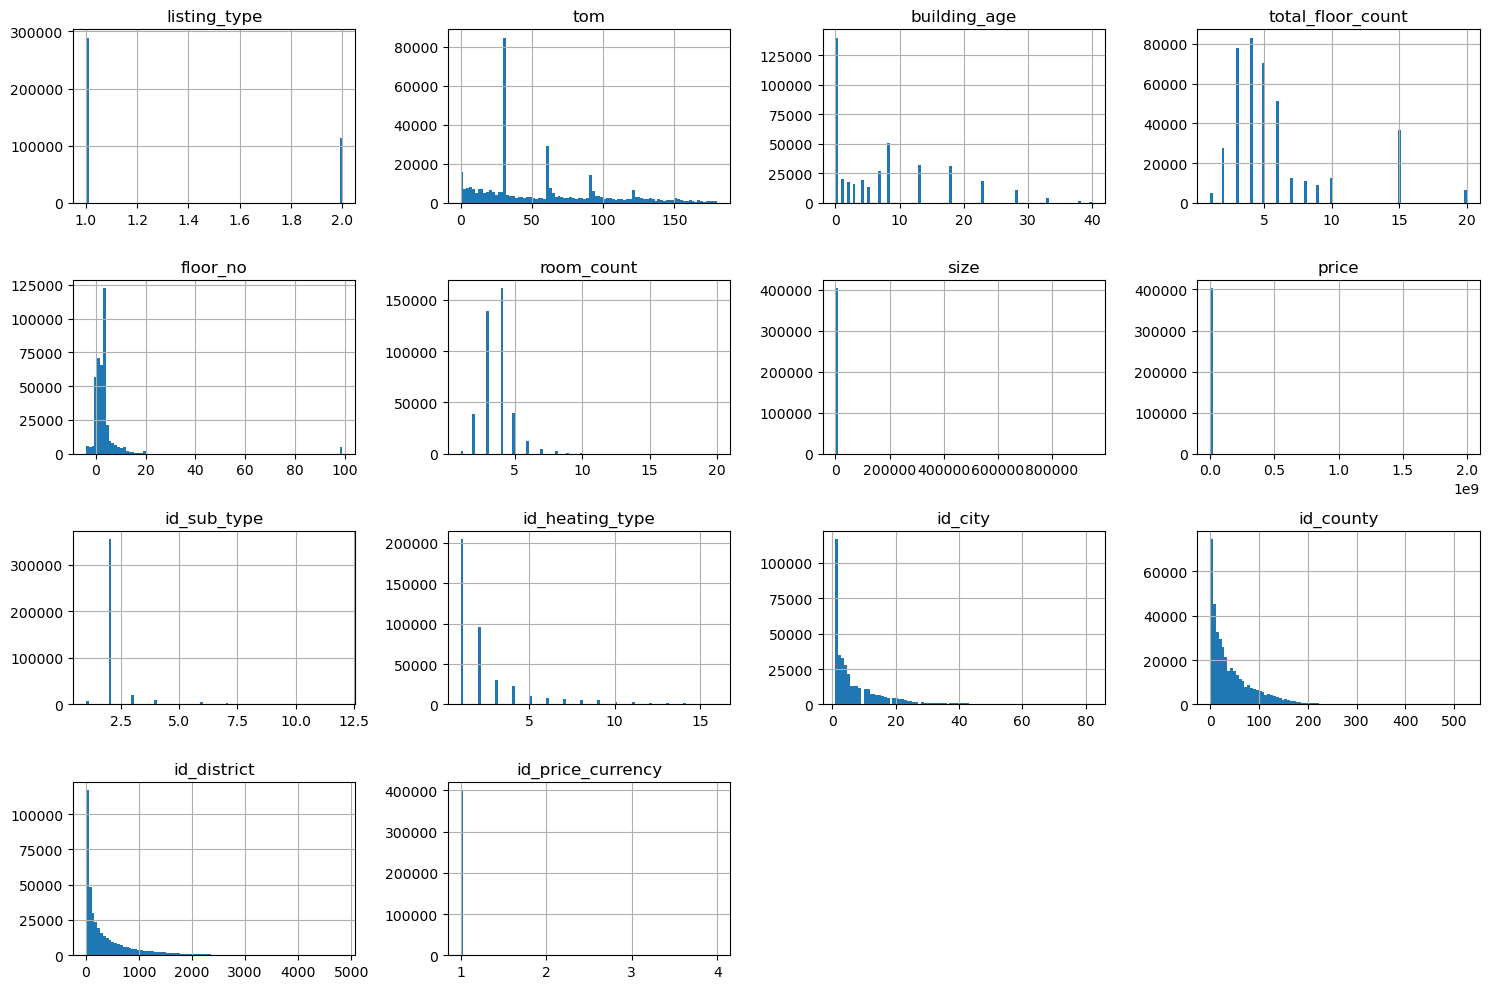

In [361]:
import matplotlib.pyplot as plt


data.hist(figsize=(15, 10), bins=90)
plt.tight_layout()
plt.show()

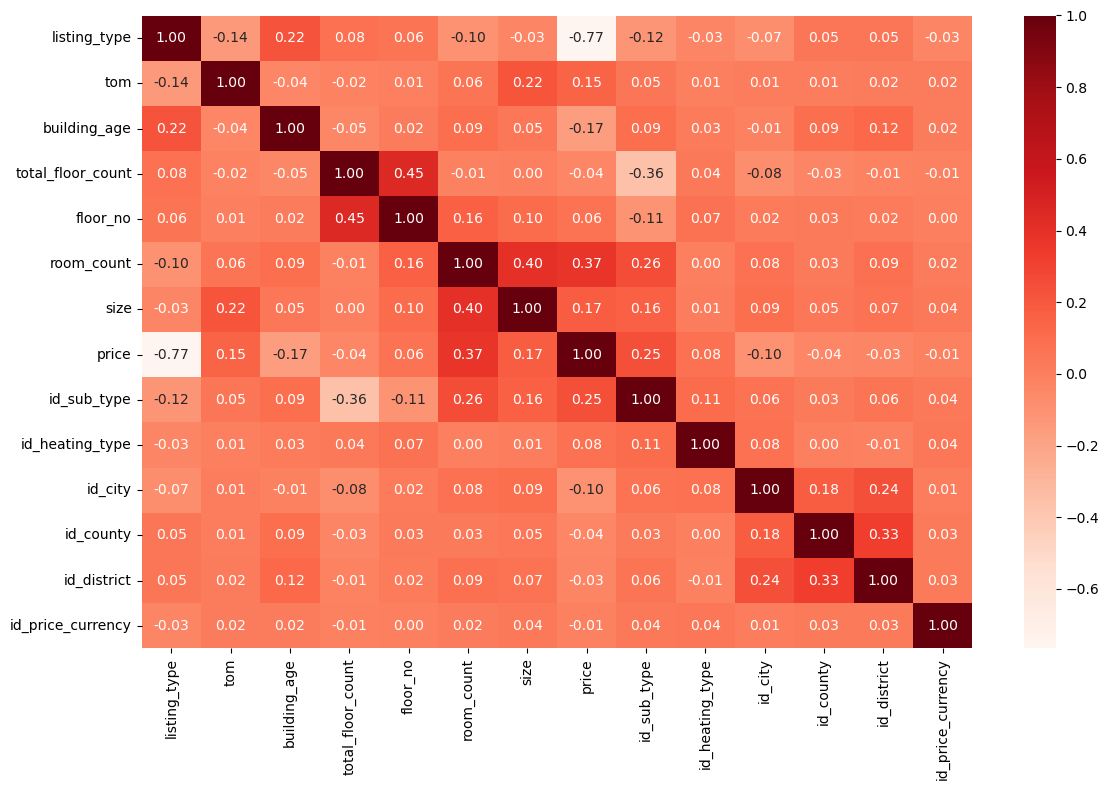

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='Reds', fmt='.2f')

plt.tight_layout()
plt.show()

## Классификация

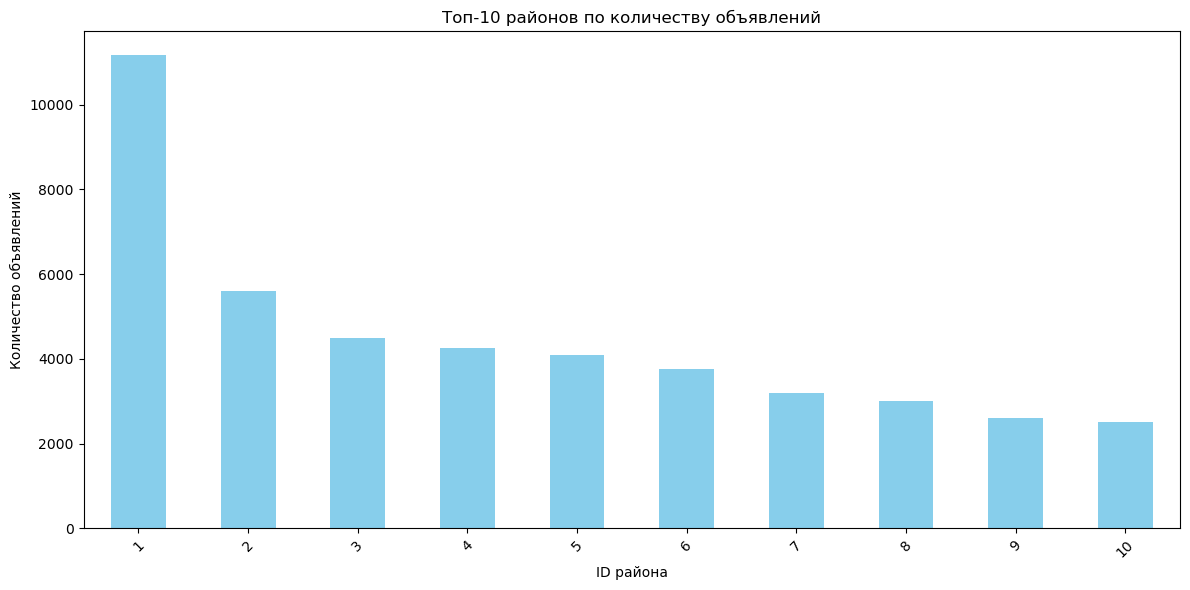

In [368]:
# Топ-10 районов по количеству объявлений
top_districts = data['id_district'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_districts.plot(kind='bar', color='skyblue')
plt.title('Топ-10 районов по количеству объявлений')
plt.xlabel('ID района')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Регрессия

In [373]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [374]:
X = data[['size']]  # Фактор
y = data['price']   # Целевая переменная

data_clean = data.dropna(subset=['size', 'price'])
X = data_clean[['size']]
y = data_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [375]:
print(f"R-2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"\nКоэффициент (size): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

R-2 Score: 0.000
MAE: 349674.13
MSE: 36779931230411.74
RMSE: 6064646.01

Коэффициент (size): 2.56
Intercept: 350832.42


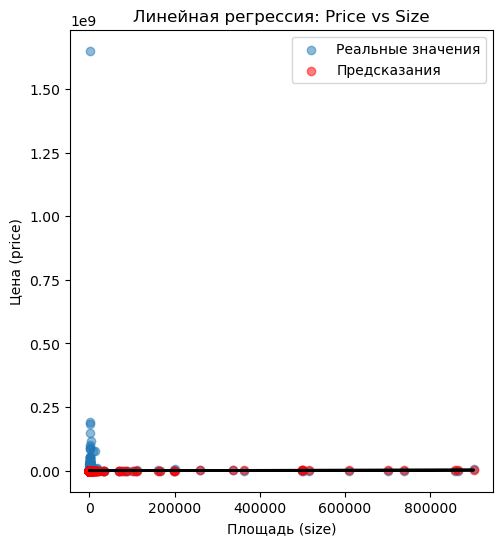

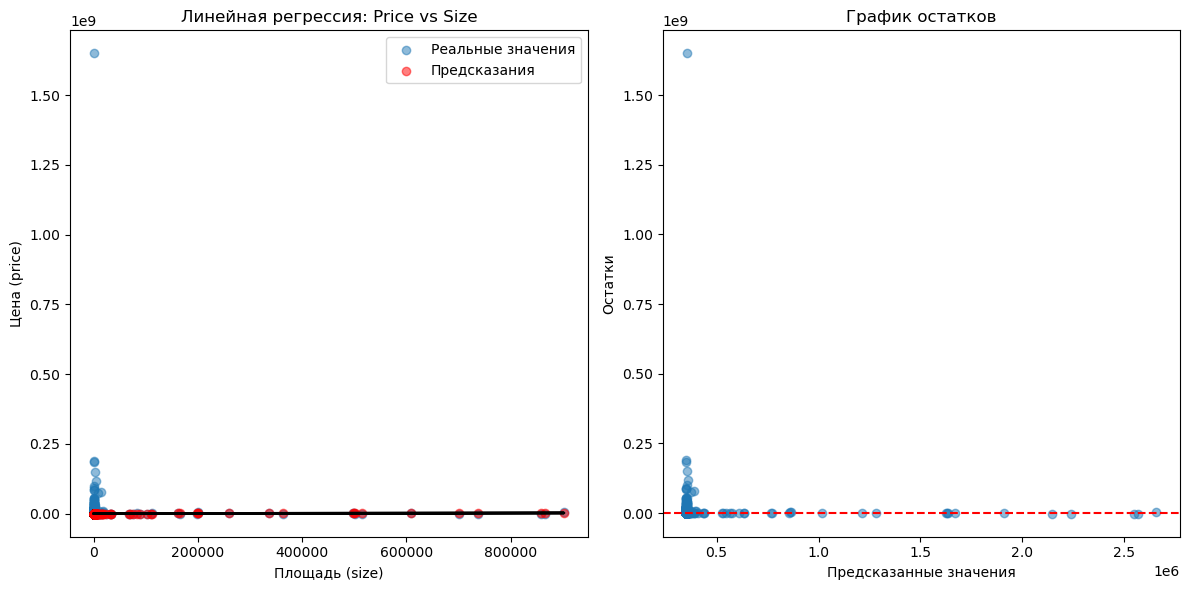

In [377]:
# Визуализация
plt.figure(figsize=(12, 6))

# График предсказаний vs реальных значений
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, alpha=0.5, label='Реальные значения')
plt.scatter(X_test, y_pred, alpha=0.5, color='red', label='Предсказания')
plt.plot(X_test, model.predict(X_test), color='black', linewidth=2)
plt.xlabel('Площадь (size)')
plt.ylabel('Цена (price)')
plt.title('Линейная регрессия: Price vs Size')
plt.legend()

# График остатков
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')

plt.tight_layout()
plt.show()

## Обучение моделей:

### Бэггинг

In [378]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest (бэггинг над деревьями)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Или Bagging с любой базовой моделью
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

### Бустинг

In [379]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# AdaBoost
ada_model = AdaBoostRegressor(n_estimators=50, random_state=42)

### Стекинг

In [380]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Стекинг нескольких моделей
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=50)),
        ('gb', GradientBoostingRegressor(n_estimators=50)),
        ('svr', SVR())
    ],
    final_estimator=LinearRegression()
)

In [ ]:
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print(f"R²: {r2_score(y_test, stacking_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, stacking_pred):.2f}")

# Сравнение моделей
print("\n=== СРАВНЕНИЕ МОДЕЛЕЙ ===")
print(f"Random Forest R²:    {r2_score(y_test, rf_pred):.3f}")
print(f"Gradient Boosting R²: {r2_score(y_test, gb_pred):.3f}")
print(f"Stacking R²:         {r2_score(y_test, stacking_pred):.3f}")

### ТЕСТ

In [ ]:
# Подготовка данных
X = data.drop('price', axis=1).select_dtypes(include=['number'])
y = data['price']

# Удаляем пропуски
data_clean = data.dropna(subset=X.columns.tolist() + ['price'])
X = data_clean[X.columns]
y = data_clean['price']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем категории цены для классификационного отчета
y_test_cat = pd.cut(y_test, bins=3, labels=[0, 1, 2])

## Бэггинг

In [ ]:
# Обучение модели
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Преобразуем предсказания в категории
rf_pred_cat = pd.cut(rf_pred, bins=3, labels=[0, 1, 2])

# Вывод результатов
print("=== Random Forest (Бэггинг) ===")
print(classification_report(y_test_cat, rf_pred_cat))
print(f"R²: {r2_score(y_test, rf_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, rf_pred):.2f}")

# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_cat, rf_pred_cat), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Бустинг

In [ ]:
# Обучение модели
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Преобразуем предсказания в категории
gb_pred_cat = pd.cut(gb_pred, bins=3, labels=[0, 1, 2])

# Вывод результатов
print("\n=== Gradient Boosting (Бустинг) ===")
print(classification_report(y_test_cat, gb_pred_cat))
print(f"R²: {r2_score(y_test, gb_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, gb_pred):.2f}")

# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_cat, gb_pred_cat), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Стекинг

In [ ]:
# Обучение модели
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=50)),
        ('gb', GradientBoostingRegressor(n_estimators=50)),
        ('svr', SVR())
    ],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

# Преобразуем предсказания в категории
stacking_pred_cat = pd.cut(stacking_pred, bins=3, labels=[0, 1, 2])

# Вывод результатов
print("\n=== Stacking ===")
print(classification_report(y_test_cat, stacking_pred_cat))
print(f"R²: {r2_score(y_test, stacking_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, stacking_pred):.2f}")

# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_cat, stacking_pred_cat), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Stacking')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Выводы


## В данной работе было проделано:
- подключение модулей
- загрузка данных
- разведочный анализ данных
- предварительная обработка данных
- визуальный анализ
- Изучена новые методы, такие как ансамблевый метод машинного обучения, и применены в в практике 
- обучение и прогнозирование моделей классификации (models fitting and prediction)


In [ ]:
# Загружаем Random Forest модель
with open('random_forest_model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)
print("✅ Random Forest модель загружена")

# Загружаем Gradient Boosting модель
with open('gradient_boosting_model.pkl', 'rb') as file:
    gb_loaded = pickle.load(file)
print("✅ Gradient Boosting модель загружена")

# Загружаем Stacking модель
with open('stacking_model.pkl', 'rb') as file:
    stacking_loaded = pickle.load(file)
print("✅ Stacking модель загружена")